# New Section

In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv",encoding =('ISO-8859-1'),low_memory =False)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
import missingno as msno

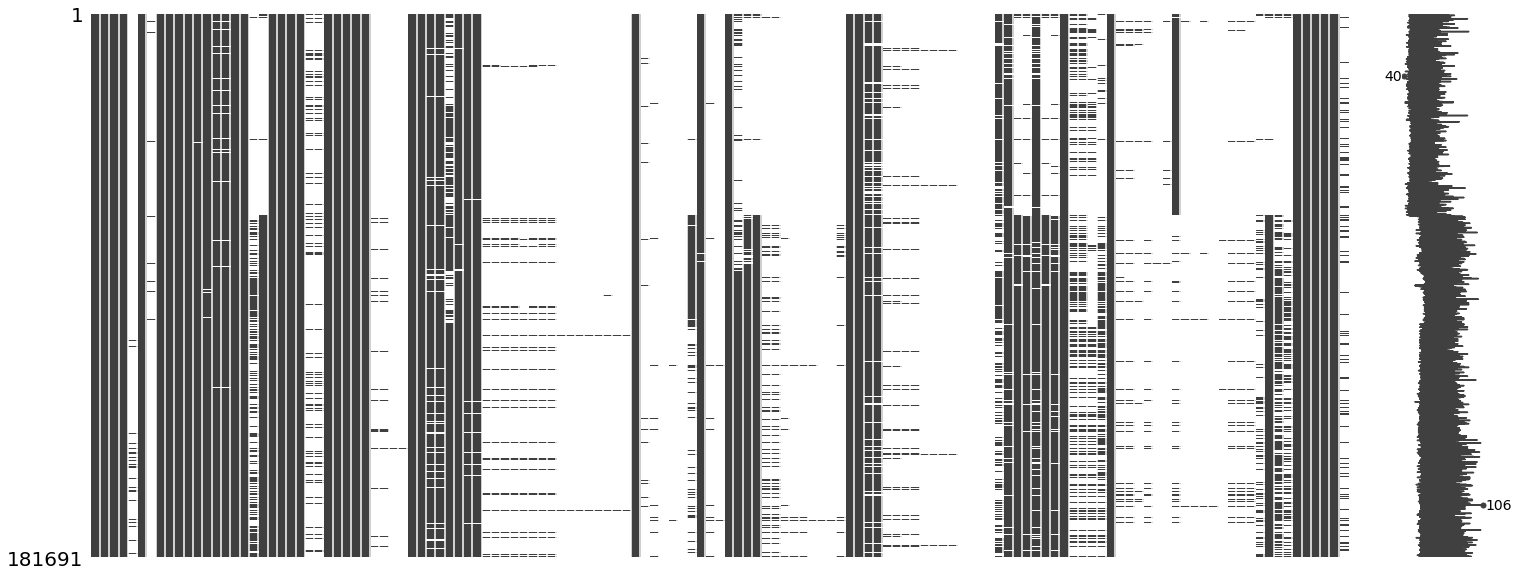

In [ ]:
msno.matrix(df)

In [ ]:
missing = df.isnull().sum()

In [ ]:
missing/len(df)

eventid       0.000000
iyear         0.000000
imonth        0.000000
iday          0.000000
approxdate    0.949150
                ...   
INT_LOG       0.000000
INT_IDEO      0.000000
INT_MISC      0.000000
INT_ANY       0.000000
related       0.862195
Length: 135, dtype: float64

In [ ]:
perc =70
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propcomment', 'ishostkid', 'ransom', 'scite1',
       'scite2', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
df.shape

(181691, 64)

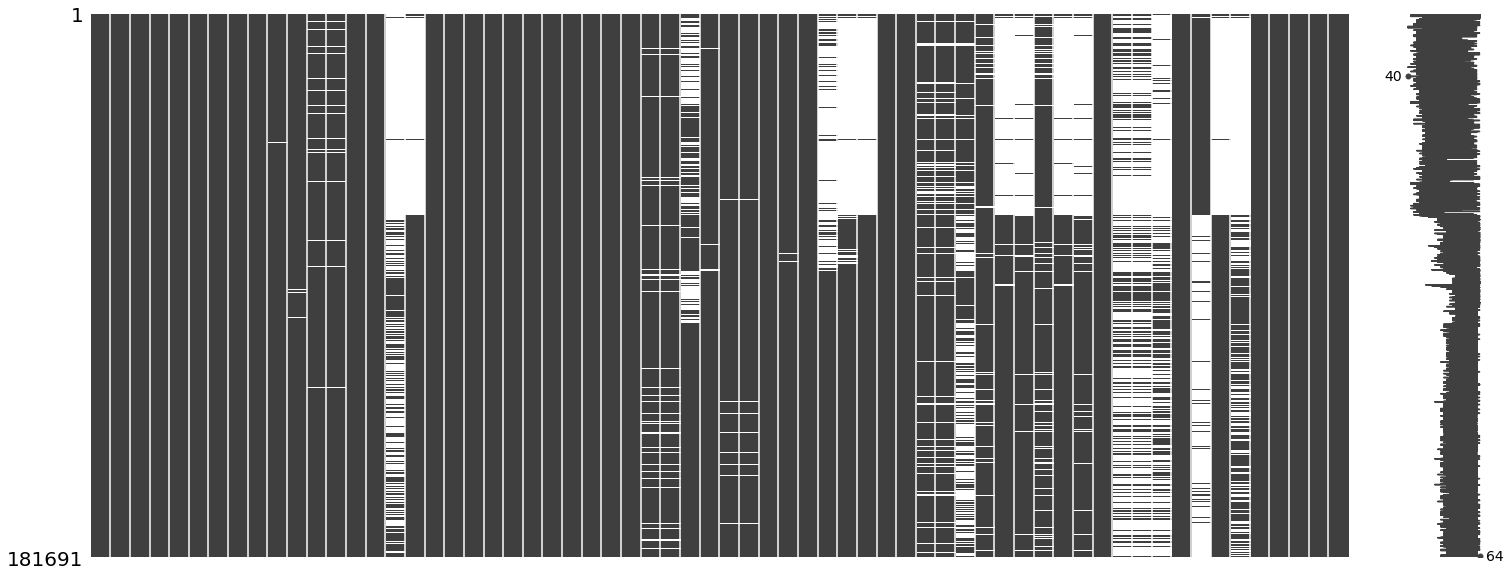

In [ ]:
msno.matrix(df)

In [ ]:
#dealing with the missing values
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df.fillna(value = 0).tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,unknown,0.0,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Seven military planes were damaged in this att...,0.0,0.0,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Houses were damaged in this attack.,0.0,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",unknown,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,unknown,0.0,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",unknown,START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,unknown,0.0,0.0,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",START Primary Collection,-9,-9,0,-9


In [ ]:
#segregating numerical and categorical columns
categorical_f=df.select_dtypes(include=np.object).columns
numerical_f=df.select_dtypes(include=np.number).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
numerical_f

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [34]:
categorical_f

Index(['country_txt', 'region_txt', 'provstate', 'city', 'location', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'propextent_txt', 'propcomment', 'scite1', 'scite2',
       'dbsource'],
      dtype='object')

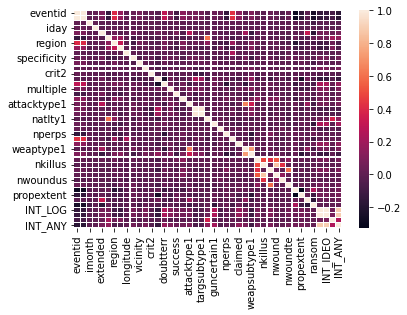

In [52]:
corr=df[numerical_f].corr()
sns.heatmap(corr, annot=False,linewidths=.8)

Text(0.5, 1.0, 'Count plot for Terrorist Actions in Customized Region ')

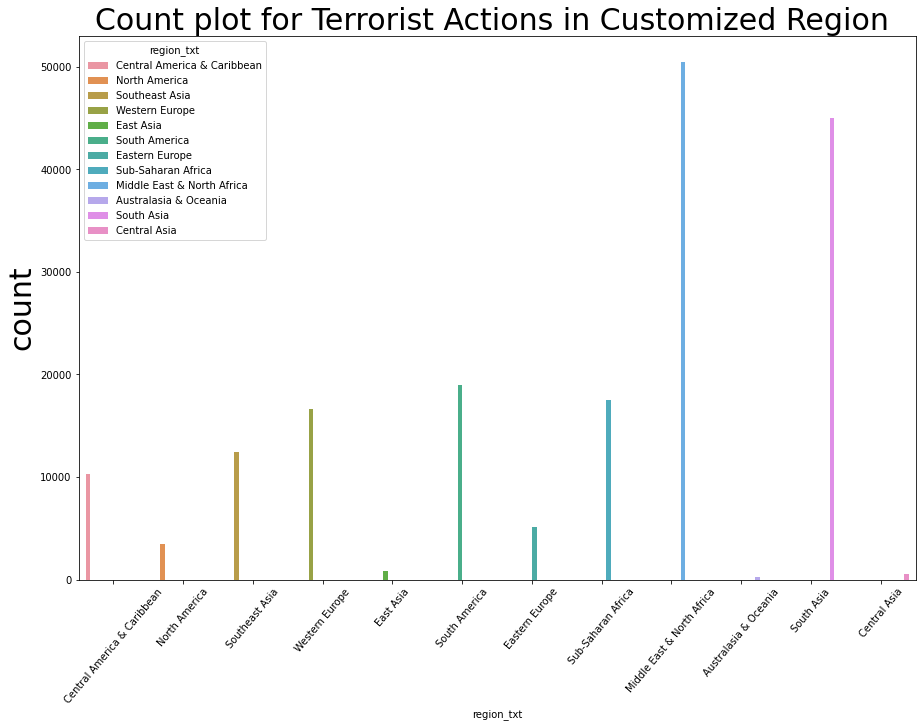

In [40]:
#Frequency of Terrorist Actions in Customized Region
plt.figure(figsize=(15,10))
sns.countplot(x='region_txt',hue='region_txt',data=df)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation = 50)
plt.title('Count plot for Terrorist Actions in Customized Region ',fontsize=30)

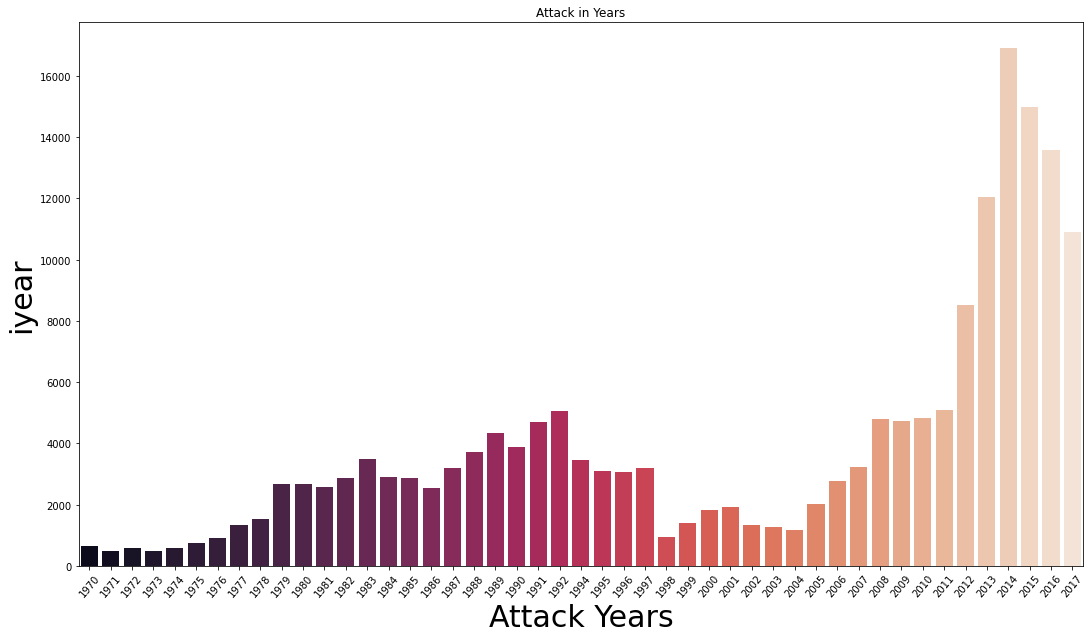

In [28]:
#bar plot for number of attack each year.
year = df['iyear'].unique()
year_counts = df['iyear'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
plt.title("Attack in Years")
plt.xlabel("Attack Years", fontsize=30)
plt.ylabel("Number of attacks each year", fontsize=30)
plt.xticks(rotation = 50)
sns.barplot(x=year, y=year_counts, palette= 'rocket')
plt.show()

In [41]:
#top 10 attack types
attack_type = df.attacktype1_txt.value_counts()[:10]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [43]:
attack_wound = df[['attacktype1_txt','nwound']].groupby(["attacktype1_txt"],axis=0).sum()
attack_wound

,nwound
attacktype1_txt,
Armed Assault,77366.0
Assassination,13887.0
Bombing/Explosion,372686.0
Facility/Infrastructure Attack,3765.0
Hijacking,17001.0
Hostage Taking (Barricade Incident),3966.0
Hostage Taking (Kidnapping),6446.0
Unarmed Assault,14027.0
Unknown,14725.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


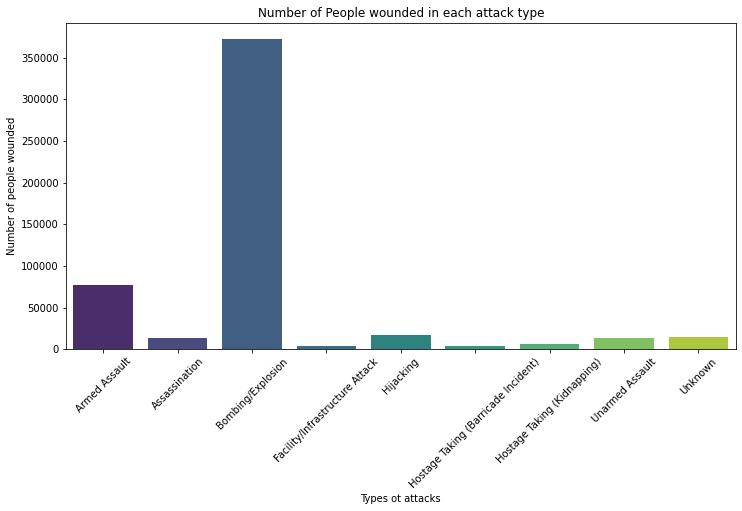

In [45]:
# People Wounded in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(attack_wound.index, attack_wound.nwound.values,palette="viridis")
plt.title('Number of People wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 45)
plt.show()

In [33]:
attack_city = df.city.value_counts()[:15]
attack_city

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

In [47]:
group_kill= df[['gname','nkill']].groupby(['gname'],axis=0).sum().sort_values('nkill', ascending=False).head(15)
group_kill

,nkill
gname,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


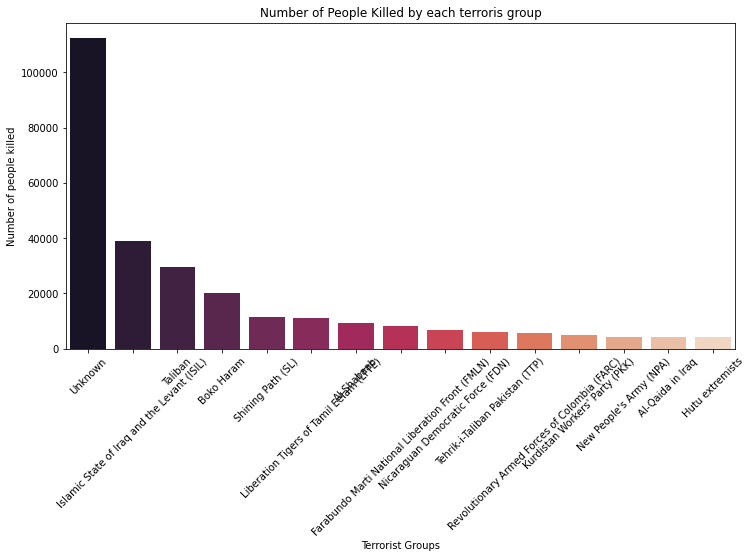

In [49]:
# People Killed by each group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(group_kill.index, group_kill.nkill.values,palette="rocket")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()